In [15]:
import os
import json
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Path to your dataset folder
dataset_path = "E:/Projects ML/AL & DA Intern ASDC AI/Task2 AI/flower_data"

# Function to read JSON file and return the data inside it
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Read labels from JSON file
labels_file_path = os.path.join(dataset_path, "E:/Projects ML/AL & DA Intern ASDC AI/Task2 AI/flower_data/flower_data/cat_to_name.json")
labels = read_json(labels_file_path)

# Function to read images and labels
def read_images_and_labels(data_path, target_size=(224, 224), grayscale=False):
    images = []
    image_labels = []
    
    for class_folder in os.listdir(data_path):
        class_path = os.path.join(data_path, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                if image_file.endswith(('.jpg', '.jpeg', '.png')):
                    # Read image
                    img = Image.open(image_path)
                    
                    # Convert to grayscale if specified
                    if grayscale:
                        img = img.convert('L')
                    
                    # Resize image
                    img = img.resize(target_size)
                    
                    # Convert PIL Image to numpy array
                    img_array = img_to_array(img)
                    
                    # Normalize pixel values to be between 0 and 1
                    img_array /= 255.0
                    
                    images.append(img_array)
                    
                    # Get label from JSON
                    label = labels.get(class_folder, "Unknown")
                    image_labels.append(label)
    
    return np.array(images), image_labels

In [11]:
# Call the function to read and preprocess grayscale images
train_data_path = os.path.join(dataset_path, "train")
train_images, train_labels = read_images_and_labels('E:/Projects ML/AL & DA Intern ASDC AI/Task2 AI/flower_data/flower_data/train', grayscale=True)

In [16]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

Number of images: 6552
Number of labels: 6552


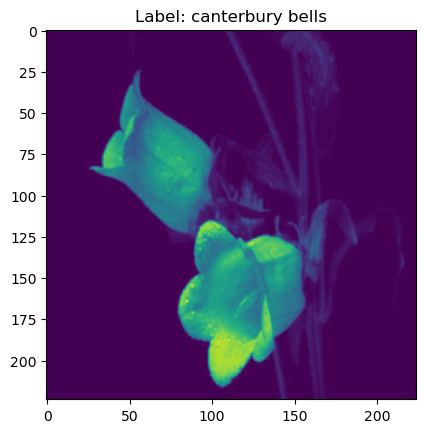

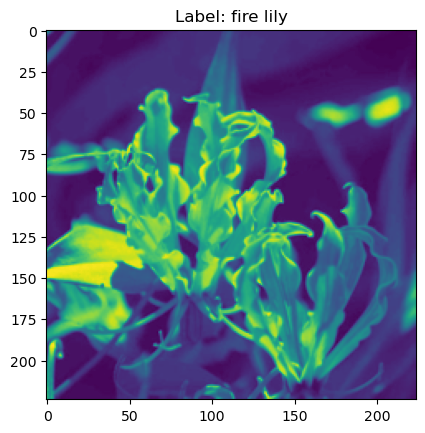

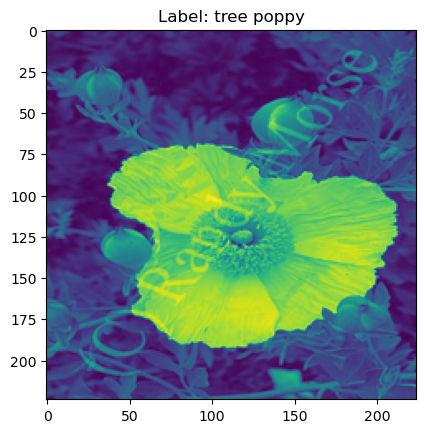

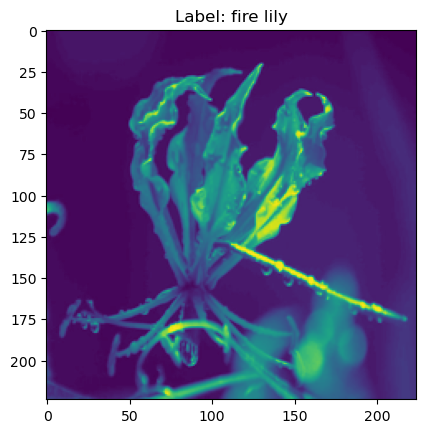

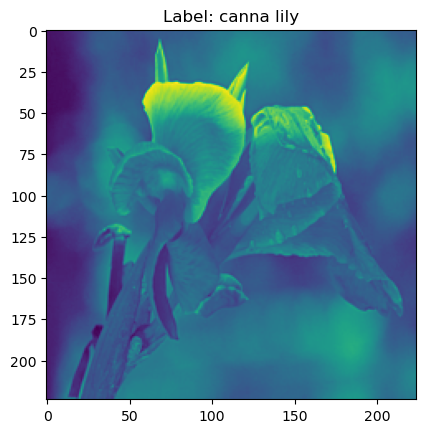

In [17]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

# Check the number of images and labels
print(f"Number of images: {len(train_images)}")
print(f"Number of labels: {len(train_labels)}")

# Visualize a few samples
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i]}")
    plt.show()

In [13]:
#calling function to loop over our valid folder
valid_data_path = os.path.join(dataset_path, "valid")
valid_images, valid_labels = read_images_and_labels('E:/Projects ML/AL & DA Intern ASDC AI/Task2 AI/flower_data/flower_data/valid',grayscale=True)

In [18]:
from sklearn.utils import shuffle
valid_images, valid_labels= shuffle(valid_images, valid_labels, random_state=42)

Number of images: 818
Number of labels: 818


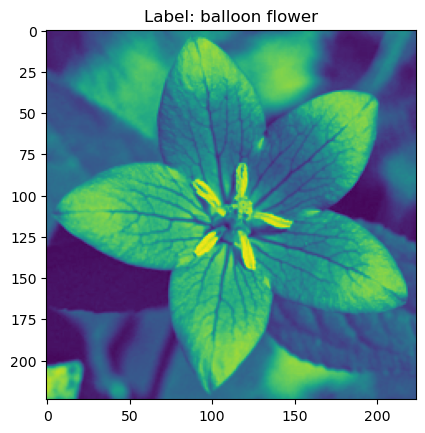

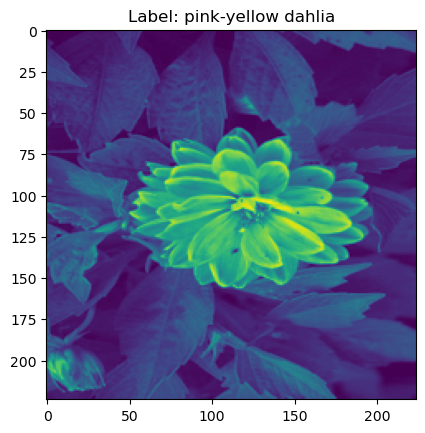

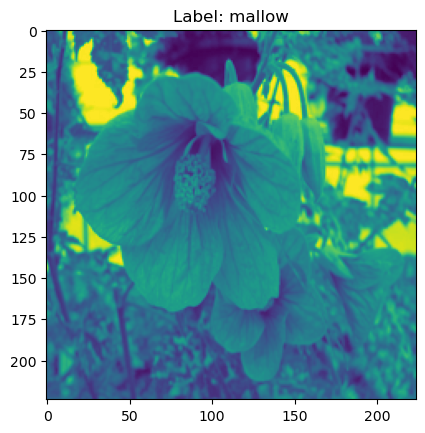

In [19]:
# Check the number of images and labels
print(f"Number of images: {len(valid_images)}")
print(f"Number of labels: {len(valid_labels)}")

# Visualize a few samples
num_samples_to_visualize = 3
for i in range(num_samples_to_visualize):
    plt.imshow(valid_images[i])
    plt.title(f"Label: {valid_labels[i]}")
    plt.show()

buliding the model